In [6]:
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats
import commands

In [7]:
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
sub_path = dir_path+"data/external/R21_36_Cyl_Aqueous/"
img_path = dir_path+"data/processed/"

In [7]:
def create_erode_image(sub_path, erode = "1", xminusy = "6minus4"):
    cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy
    #print commands.getoutput("3dcalc -a "+cwd+"/mask.nii.gz -prefix "+cwd+"/mask_erode1.nii.gz -b a+i -c a-i -d a+j -e a-j -f a+k -g a-k -expr 'a*(1-amongst(0,b,c,d,e,f,g))'")
    print commands.getoutput("3dmask_tool -input "+cwd+"/mask.nii.gz -prefix "+cwd+"/mask_erode"+erode+".nii.gz -dilate_result -"+erode)
    print commands.getoutput("fslmaths "+cwd+"/mask_erode"+erode+".nii.gz -mul "+cwd+"/4d_fmap_Mean.nii.gz "+cwd+"/diff_fmap_Mean_erode"+erode+".nii.gz")
    print commands.getoutput("fslmaths "+cwd+"/mask_erode"+erode+".nii.gz -mul "+cwd+"/Bvals.nii "+cwd+"/Bvals_erode"+erode+".nii.gz")
#     img_meas = nib.load(cwd+"/diff_fmap_Mean_erode"+erode+".nii.gz")
#     img_theo = nib.load(cwd+"/Bvals_erode"+erode+".nii.gz")

In [8]:
create_erode_image(dir_path, "1", "56minus54")

++ no -frac option: defaulting to -union
++ processing 1 input dataset(s), NN=2...
++ padding all datasets by 0 (for dilations)
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 33988 survived, 146236 were zero
++ writing result mask_erode1.nii.gz...
++ Output dataset /Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/data/external/R21_36_Cyl_Aqueous/NIFTI/bmaps_numpy/56minus54//mask_erode1.nii.gz




In [4]:
def create_predict_erode(sub_path, img_path, erode='1', xminusy = "6minus4"):
    cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy
    print commands.getoutput("fslmaths "+cwd+"/mask_erode"+erode+".nii.gz -mul "+img_path+"/predicted_nn_nonzero_32to38_3layer5unit.nii.gz "+img_path+"/predicted_nn_nonzero_32to38_3layer5unit_erode.nii.gz")
    

In [5]:
xminusy = "46minus44" # run 5
create_predict_erode(sub_path, img_path, '1', xminusy)

# Create graph for erode

## Physics vs Theory

r: 0.06228, st_er: 0.023157
y = 0.6134*x + -0.4516


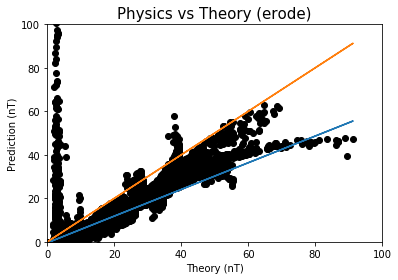

In [8]:
xminusy = "56minus54" # run 6
erode = '1'
sub_path = dir_path+"data/external/R21_36_Cyl_Aqueous/"
cwd = sub_path+"NIFTI/bmaps_numpy/"+xminusy+"/"
img_meas = nib.load(cwd+"/diff_fmap_Mean_erode"+erode+".nii.gz")
img_theo = nib.load(cwd+"/Bvals_erode"+erode+".nii.gz")

data_meas = img_meas.get_data()
data_theo = img_theo.get_data()
x = data_theo.flatten()
y = data_meas.flatten()

m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(x, y,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Physics vs Theory (erode)", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

## Predict vs Theory

r: 0.98466, st_er: 0.000440
y = 1.0534*x + 0.0352


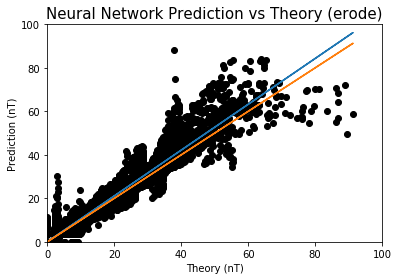

In [9]:
img_pred = nib.load(img_path+"/predicted_nn_nonzero_32to38_3layer5unit_erode.nii.gz")
data_pred = img_pred.get_data()

x = data_theo.flatten()
y = data_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(x, y,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory (erode)", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Play ground

In [ ]:
# command line
#fslroi Bvals.nii crop_bval_11_33_28_42_6_55.nii.gz 11 22 28 16 6 49
#fslroi predicted_nn_nonzero_36to38.nii crop_pred_11_33_28_42_6_55.nii.gz 11 22 28 16 6 49

In [12]:
tdir = '/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/data/external/R21_36_Cyl_Aqueous/NIFTI/bmaps_numpy/56minus54/'

In [13]:
pred_img = nib.load(tdir+"crop_pred_11_33_28_42_6_55.nii.gz")
bval_img = nib.load(tdir+"crop_bval_11_33_28_42_6_55.nii.gz")

In [19]:
pred_data = pred_img.get_data()
bval_data = bval_img.get_data()

In [17]:
pred_data.flatten()

array([4.6401663, 4.2926555, 3.8183494, ..., 3.4961429, 3.8389475,
       3.8791254], dtype=float32)

r: 0.92168, st_er: 0.002415
y = 0.7536*x + 0.9555


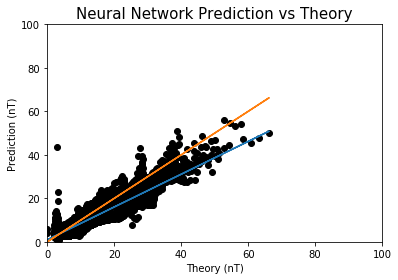

In [21]:
x = bval_data.flatten()
y = pred_data.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(x, y,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))